<h1 style="text-align:center">General Relativity using CAS</h1>
<h3 style="text-align:center">with Sagemath</h3>

<h3 style="text-align:center"><img src="sage_logo.png" width=100%></h3>

<h4 style="text-align:center">Tae Geun Kim</h4>

## Table of Contents

1. Brief introduce SageManifolds
2. Example - FRW Metric
3. Additional Features
4. Reference

## Introduce SageManifolds

### Sagemath

SageMath (previously Sage or SAGE, "System for Algebra and Geometry Experimentation") is a mathematical software with features covering many aspects of mathematics, including algebra, combinatorics, numerical mathematics, number theory, and calculus.

### SageManifolds

SageManifolds (following styling of SageMath) is an extension fully integrated into SageMath, to be used as a package for differential geometry and tensor calculus. 

## FRW Metric

### - Process

1. Define Geometric Structure
2. Insert Energy-Momentum Tensor (Perfect Fluid)
3. Solve Einstein Equation

## 1. Geometric Structure

: We should make geometric structure on manifold to solve Einstein eq.
1. Declare Manifold
2. Define Chart
3. Declare Variables
4. Define Metric
5. Obtain Connection
6. Obtain Ricci tensor
7. Obtain Ricci Scalar
8. Obtain Einstein Tensor

### 1) Manifold

Manifold is base structure for Differential Geometry. In physics, we use differential manifold.  
$$(\mathcal{M}, \mathcal{T})$$

In [1]:
%display latex

In [2]:
# Declare manifold
M = Manifold(4, 'M', '\mathcal{M}')

# Define chart & range
fr.<t,r,th,ph> = M.chart(r't r:[0,+oo) th:[0,pi]:\theta ph:[0,2*pi):\phi')

show(fr)

Chart (M, (t, r, th, ph))

### 2) Metric

Metric should be needed if you want to do ordinary mathematics. In ordinary GR, we usually start physics with metric tensor.

In this time, we use FRW metric

$$g_{ab} = -dt^2 + a(t)^2 \left[ \frac{dr^2}{1-Kr^2} + r^2(d\theta^2  + \sin^2(\theta)d\phi^2)\right]$$

In [3]:
# Declare Variables
var('Lambda K G', domain='real')
a = M.scalar_field(function('a')(t), name='a')

# Define Metric
g = M.lorentzian_metric('g')
g[0,0] = -1
g[1,1] = a^2/(1-K*r^2)
g[2,2] = a^2*r^2
g[3,3] = a^2*r^2*sin(th)^2

print(g)
show(g.display())
show(g[:])

Lorentzian metric g on the 4-dimensional differentiable manifold M


g = -dt*dt - a(t)^2/(K*r^2 - 1) dr*dr + r^2*a(t)^2 dth*dth + r^2*a(t)^2*sin(th)^2 dph*dph

[                  -1                    0                    0                    0]
[                   0  -a(t)^2/(K*r^2 - 1)                    0                    0]
[                   0                    0           r^2*a(t)^2                    0]
[                   0                    0                    0 r^2*a(t)^2*sin(th)^2]

### 3) Connection

If we want to compare vectors or tensors on different points on manifold, then we should define connection.  
In ordinary GR, we use levi-civita connection which conserve metric tensor & a kind of affine connection.

$$\nabla g = 0$$

In [4]:
nab = g.connection()
show(nab.display(only_nonredundant=true))

Gam^t_r,r = -a(t)*d(a)/dt/(K*r^2 - 1) 
Gam^t_th,th = r^2*a(t)*d(a)/dt 
Gam^t_ph,ph = r^2*a(t)*sin(th)^2*d(a)/dt 
Gam^r_t,r = d(a)/dt/a(t) 
Gam^r_r,r = -K*r/(K*r^2 - 1) 
Gam^r_th,th = K*r^3 - r 
Gam^r_ph,ph = (K*r^3 - r)*sin(th)^2 
Gam^th_t,th = d(a)/dt/a(t) 
Gam^th_r,th = 1/r 
Gam^th_ph,ph = -cos(th)*sin(th) 
Gam^ph_t,ph = d(a)/dt/a(t) 
Gam^ph_r,ph = 1/r 
Gam^ph_th,ph = cos(th)/sin(th)

In [5]:
show(nab.torsion().display())
show(nab(g).display())

0

nabla_g(g) = 0

### 4) Curvature

The main object of geometric part of GR is Curvature. We treat it as strength of gravity.  
To measure curvature, we need ricci tensor, ricci scalar and finally Einstein Tensor.

$$R_{ab} = {R^c}_{acb},~ R = g^{ab}R_{ab},~G_{ab} = R_{ab} - \frac{1}{2}Rg_{ab}$$

In [6]:
Ric = nab.ricci()
print(Ric)
show(Ric.display())

Field of symmetric bilinear forms Ric(g) on the 4-dimensional differentiable manifold M


Ric(g) = -3*d^2(a)/dt^2/a(t) dt*dt - (2*(d(a)/dt)^2 + a(t)*d^2(a)/dt^2 + 2*K)/(K*r^2 - 1) dr*dr + (2*r^2*(d(a)/dt)^2 + r^2*a(t)*d^2(a)/dt^2 + 2*K*r^2) dth*dth + (2*r^2*(d(a)/dt)^2 + r^2*a(t)*d^2(a)/dt^2 + 2*K*r^2)*sin(th)^2 dph*dph

In [7]:
R = g.inverse()['^ab']*Ric['_ab']
print(R)
show(R.display())

Scalar field on the 4-dimensional differentiable manifold M


M --> R
(t, r, th, ph) |--> 6*((d(a)/dt)^2 + a(t)*d^2(a)/dt^2 + K)/a(t)^2

In [8]:
Gab = Ric - 1/2*R*g
Gab.set_name(r'G_{ab}')
show(Gab.display())

G_{ab} = 3*((d(a)/dt)^2 + K)/a(t)^2 dt*dt + ((d(a)/dt)^2 + 2*a(t)*d^2(a)/dt^2 + K)/(K*r^2 - 1) dr*dr + (-r^2*(d(a)/dt)^2 - 2*r^2*a(t)*d^2(a)/dt^2 - K*r^2) dth*dth - (r^2*(d(a)/dt)^2 + 2*r^2*a(t)*d^2(a)/dt^2 + K*r^2)*sin(th)^2 dph*dph

## 2. Matter Information

: To generate gravity, we should need matter which is source of gravity.

1. Write matter Lagrangian (by hand)
2. Obtain Energy-Momentum Tensor with Noether's Theorem. (by hand)
3. Set variables
4. Insert Energy-Momentum Tensor with variables

But this time, we start from 3 with perfect fluid

### 1) Energy-Momentum Tensor

Source of gravity is Energy-Momentum not just mass. The represent object of energy-momentum is Energy-Momentum Tensor.  
For perfect fluid, we use next energy-momentum tensor:

$$T_{ab} = (\rho + P)u_a u_b + Pg_{ab}$$

In [9]:
# Declare scala fields
rho = M.scalar_field(function('rho')(t), name='rho', latex_name=r'\rho')
P = M.scalar_field(function('P')(t), name='P')

# Declare Vector Fields
u = M.vector_field('u', latex_name=r'u^a')
u[0] = 1
show(u.display())

# Vector to Covector (1-form)
u_form = u.down(g)
u_form.set_name(r'u_a')
show(u_form.display())

# Define energy momentum tensor
T = (rho + P)*u_form*u_form + P*g
T.set_name(r'T_{ab}')
show(T.display())

u = d/dt

u_a = -dt

T_{ab} = rho(t) dt*dt - P(t)*a(t)^2/(K*r^2 - 1) dr*dr + r^2*P(t)*a(t)^2 dth*dth + r^2*P(t)*a(t)^2*sin(th)^2 dph*dph

In [10]:
Tmix = g.inverse()['^ab']*T['_bc']
Tmix.set_name(r'{T^a}_b')
show(Tmix.display())
show(Tmix[:])

{T^a}_b = -rho(t) d/dt*dt + P(t) d/dr*dr + P(t) d/dth*dth + P(t) d/dph*dph

[-rho(t)       0       0       0]
[      0    P(t)       0       0]
[      0       0    P(t)       0]
[      0       0       0    P(t)]

In [11]:
# Covariant Derivative of T
DTmix = nab(Tmix)
DTmix.set_name(r'\nabla T')

# Contract = Energy-Momentum Conserved
CT = DTmix['^a_ba']
print("Energy-Momentum Conserved:\n")
show(-CT[0].expr().expand() == 0)

Energy-Momentum Conserved:



3*P(t)*diff(a(t), t)/a(t) + 3*rho(t)*diff(a(t), t)/a(t) + diff(rho(t), t) == 0

## 3. Solve Einstein Equation 

: The equation of motion on Curved space-time is represented as Einstein equation.  
If you want to get some physical statement, then should solve Einstein eq.

$$G_{ab} + \Lambda g_{ab} = 8\pi G T_{ab}$$

In [12]:
EE = Gab + Lambda*g - 8*pi*G*T
print("Friedmann Equaiton:\n")
show(EE[0,0].expr().expand() == 0)
#show(EE[:])

Friedmann Equaiton:



-8*pi*G*rho(t) - Lambda + 3*diff(a(t), t)^2/a(t)^2 + 3*K/a(t)^2 == 0

## 4. Finish

We got two equations from Energy-Momentum Conserved & Einstein equation.  
We can more simplify two equations by substitution of $H = \dot{a} / a$.

\begin{gather}
\dot{\rho} + 3H(\rho + P) = 0 \\
H^2 = \frac{8\pi G\rho}{3} - \frac{K}{a^2} 
\end{gather}

## Additional Features

* Plot coordinate map
* Solve Differential Equations
* etc..

In [13]:
reset();
viewer3D = 'threejs' # must be 'threejs', jmol', 'tachyon' or None (default)

In [14]:
S2 = Manifold(2, 'S^2', latex_name=r'\mathbb{S}^2', start_index=1)
U = S2.open_subset('U') ; print(U)
V = S2.open_subset('V') ; print(V)
S2.declare_union(U, V)
stereoN.<x,y> = U.chart()
stereoS.<xp,yp> = V.chart("xp:x' yp:y'")

stereoN_to_S = stereoN.transition_map(stereoS, 
                                      (x/(x^2+y^2), y/(x^2+y^2)), 
                                      intersection_name='W',
                                      restrictions1= x^2+y^2!=0, 
                                      restrictions2= xp^2+xp^2!=0)
stereoN_to_S.display()

Open subset U of the 2-dimensional differentiable manifold S^2
Open subset V of the 2-dimensional differentiable manifold S^2


xp = x/(x^2 + y^2)
yp = y/(x^2 + y^2)

In [15]:
stereoS_to_N = stereoN_to_S.inverse()
stereoS_to_N.display()

x = xp/(xp^2 + yp^2)
y = yp/(xp^2 + yp^2)

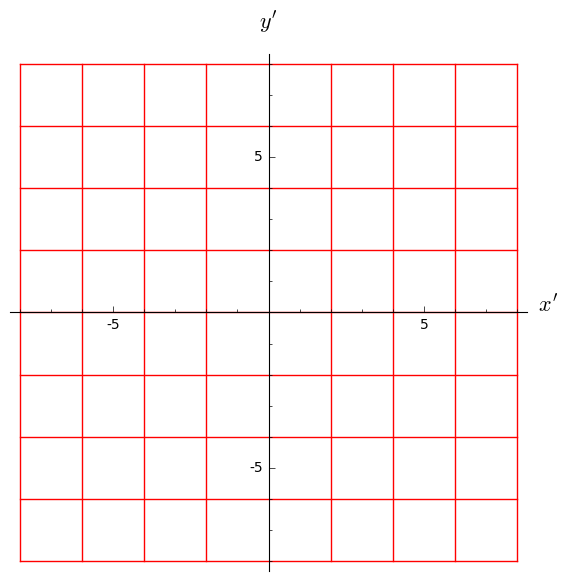

In [16]:
W = U.intersection(V)
stereoN_W = stereoN.restrict(W)
stereoS_W = stereoS.restrict(W)
stereoS_W.plot()

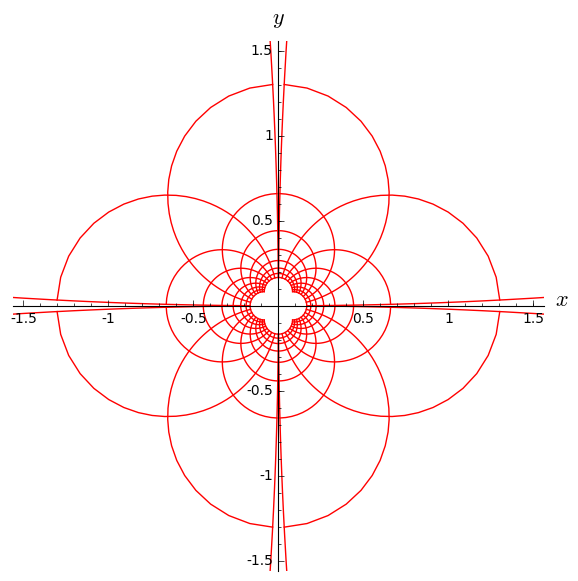

In [17]:
graphSN1 = stereoS_W.plot(stereoN, ranges={xp:[-6,-0.02], yp:[-6,-0.02]})
graphSN2 = stereoS_W.plot(stereoN, ranges={xp:[-6,-0.02], yp:[0.02,6]})
graphSN3 = stereoS_W.plot(stereoN, ranges={xp:[0.02,6], yp:[-6,-0.02]})
graphSN4 = stereoS_W.plot(stereoN, ranges={xp:[0.02,6], yp:[0.02,6]})
show(graphSN1+graphSN2+graphSN3+graphSN4,
     xmin=-1.5, xmax=1.5, ymin=-1.5, ymax=1.5)

In [18]:
A = W.open_subset('A', coord_def={stereoN_W: (y!=0, x<0), 
                                  stereoS_W: (yp!=0, xp<0)})
stereoN_A = stereoN_W.restrict(A)
spher.<th,ph> = A.chart(r'th:(0,pi):\theta ph:(0,2*pi):\phi')

spher_to_stereoN = spher.transition_map(stereoN_A, 
                                        (sin(th)*cos(ph)/(1-cos(th)),
                                         sin(th)*sin(ph)/(1-cos(th))))

spher_to_stereoN.set_inverse(2*atan(1/sqrt(x^2+y^2)), atan2(-y,-x)+pi,
                             verbose=True)

stereoN_to_S_A = stereoN_to_S.restrict(A)
spher_to_stereoS = stereoN_to_S_A * spher_to_stereoN
stereoS_to_N_A = stereoN_to_S.inverse().restrict(A)
stereoS_to_spher = spher_to_stereoN.inverse() * stereoS_to_N_A 

Check of the inverse coordinate transformation:
  th == 2*arctan(sqrt(-cos(th) + 1)/sqrt(cos(th) + 1))
  ph == pi + arctan2(sin(ph)*sin(th)/(cos(th) - 1), cos(ph)*sin(th)/(cos(th) - 1))
  x == x
  y == y


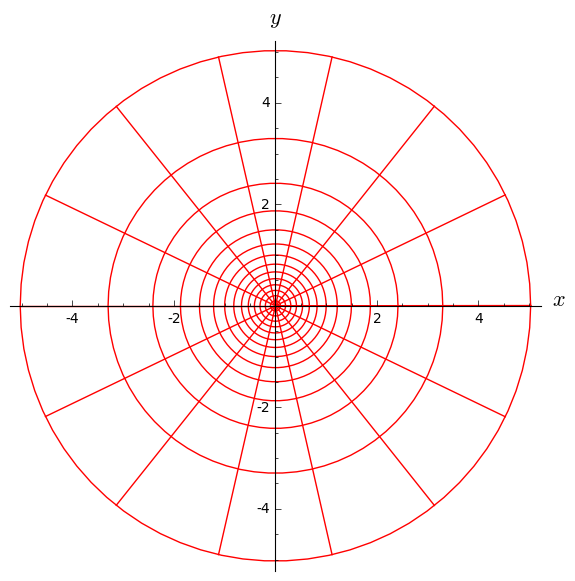

In [19]:
spher.plot(stereoN, number_values=15, ranges={th: (pi/8,pi)})

In [20]:
N = V.point((0,0), chart=stereoS, name='N') 
S = U.point((0,0), chart=stereoN, name='S') 
E = S2((0,1), chart=stereoN, name='E')
E.coord(spher)

(1/2*pi, 1/2*pi)

In [21]:
R3 = Manifold(3, 'R^3', r'\mathbb{R}^3', start_index=1)
cart.<X,Y,Z> = R3.chart() ; cart

Phi = S2.diff_map(R3, {(stereoN, cart): 
                       [2*x/(1+x^2+y^2), 2*y/(1+x^2+y^2),
                        (x^2+y^2-1)/(1+x^2+y^2)],
                       (stereoS, cart): 
                       [2*xp/(1+xp^2+yp^2), 2*yp/(1+xp^2+yp^2),
                        (1-xp^2-yp^2)/(1+xp^2+yp^2)]},
                  name='Phi', latex_name=r'\Phi')

In [22]:
N1 = Phi(N)
S1 = Phi(S)
E1 = Phi(E)

In [23]:
Phi.expr(stereoN_A, cart)
Phi.expr(spher, cart)

(cos(ph)*sin(th), sin(ph)*sin(th), cos(th))

In [24]:
graph_spher = spher.plot(chart=cart, mapping=Phi, number_values=11, 
                         color='blue', label_axes=False)
show(graph_spher, viewer=viewer3D)

Graphics3d Object

In [25]:
graph_stereoN = stereoN.plot(chart=cart, mapping=Phi, number_values=25, 
                             label_axes=False)
show(graph_stereoN, viewer=viewer3D)

Graphics3d Object

In [26]:
graph_stereoS = stereoS.plot(chart=cart, mapping=Phi, number_values=25, 
                             color='green', label_axes=False)
show(graph_stereoN + graph_stereoS, viewer=viewer3D)

Graphics3d Object

## Reference

* Birkandan et al. _Symbolic and Numerical Analysis in General Relativity with
Open Source Computer Algebra Systems_, arXiv: 1703.09738v1
* SageManifold Examples - https://sagemanifolds.obspm.fr